In [1]:
import math
import warnings

from IPython.display import display
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
import sklearn
from sklearn import linear_model
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [2]:
df = pd.ExcelFile("table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls")

In [3]:
df.sheet_names

['13tbl8ny']

In [4]:
df = df.parse(sheet_name='13tbl8ny', skiprows=4)

In [5]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861.000,0.000,0.000,nan,0.000,0.000,0.000,12.000,2.000,10.000,0.000,0.000
1,Addison Town and Village,2577.000,3.000,0.000,nan,0.000,0.000,3.000,24.000,3.000,20.000,1.000,0.000
2,Akron Village,2846.000,3.000,0.000,nan,0.000,0.000,3.000,16.000,1.000,15.000,0.000,0.000
3,Albany,97956.000,791.000,8.000,nan,30.000,227.000,526.000,4090.000,705.000,3243.000,142.000,nan
4,Albion Village,6388.000,23.000,0.000,nan,3.000,4.000,16.000,223.000,53.000,165.000,5.000,nan


In [6]:
df.columns

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3'],
      dtype='object')

In [7]:
# Creating the features df
features = df[['Population']]

In [8]:
print(df['Population'].isnull().values.any())

True


In [9]:
features = features.dropna(subset=['Population'])

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Population')

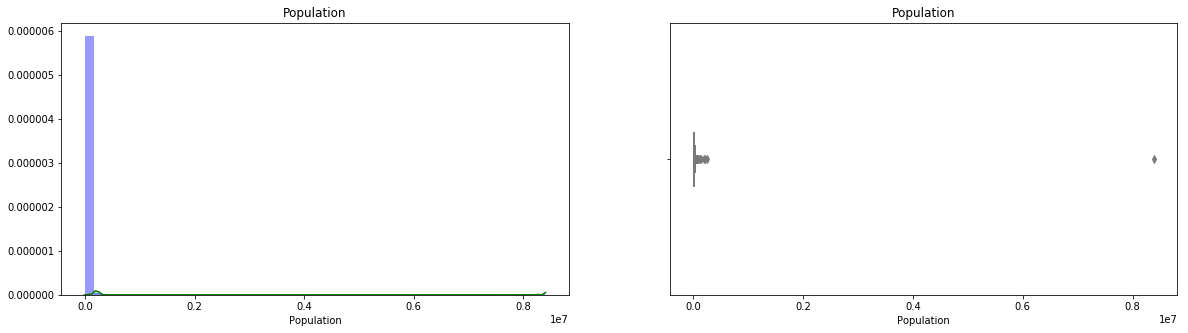

In [10]:
x = features['Population']

fig = plt.figure(figsize=(20,5))

fig.add_subplot(121)
sns.distplot(x, hist=True, color='b', kde_kws={'shade':True,'color':'g'})
plt.title('Population')

fig.add_subplot(122)
sns.boxplot(x, linewidth=1, width=0.2, palette='pastel', orient='h')
plt.title('Population')

In [11]:
print(np.sort(features.Population)[-20:])

[  51506.   55198.   57559.   58082.   61686.   66041.   68071.   78215.
   78361.   78800.   80705.   87204.   96667.   97956.  118296.  143834.
  199134.  210562.  258789. 8396126.]


In [12]:
features['Population'] = features[features.Population < 8000000.0]
features = features.dropna(subset=['Population'])

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Population')

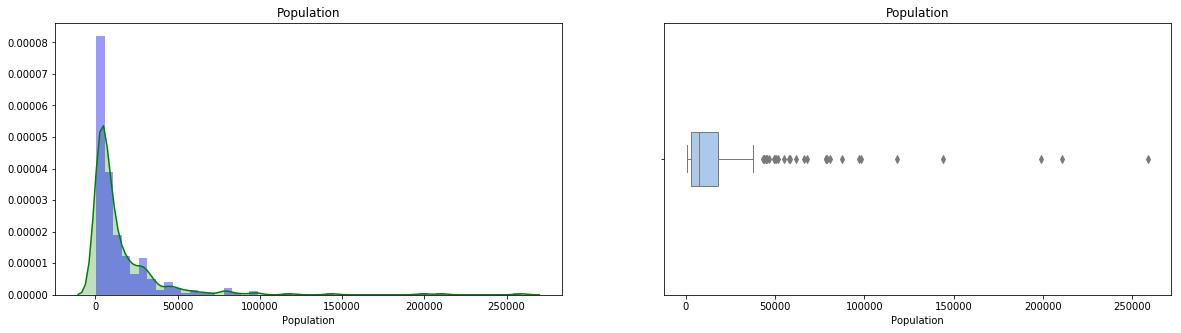

In [13]:
x = features['Population']

fig = plt.figure(figsize=(20,5))

fig.add_subplot(121)
sns.distplot(x, hist=True, color='b', kde_kws={'shade':True,'color':'g'})
plt.title('Population')

fig.add_subplot(122)
sns.boxplot(x, linewidth=1, width=0.2, palette='pastel', orient='h')
plt.title('Population')

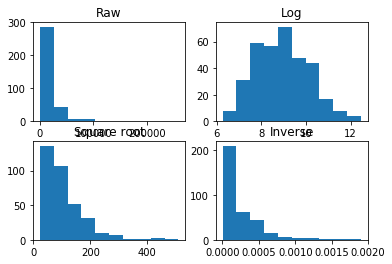

In [14]:
x = features['Population']

fig = plt.figure()

fig.add_subplot(221)
plt.hist(x)
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(x))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(x))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/x)
plt.title('Inverse')
plt.show()

In [15]:
features['Population_log'] = np.log(x)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Population')

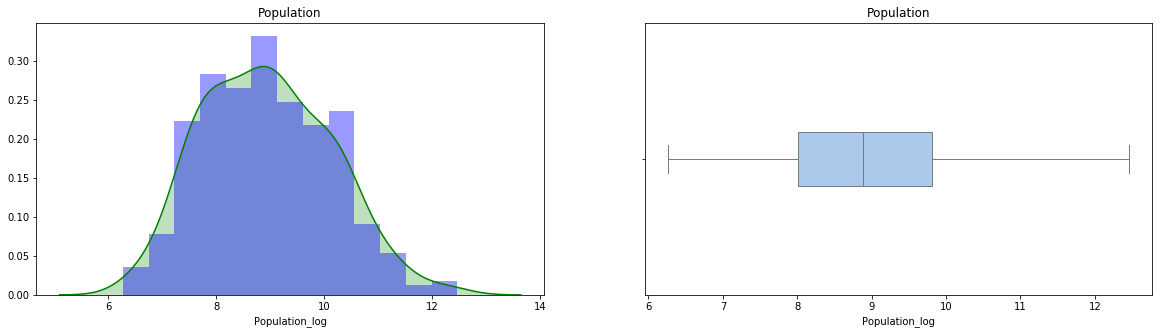

In [16]:
x = features['Population_log']

fig = plt.figure(figsize=(20,5))

fig.add_subplot(121)
sns.distplot(x, hist=True, color='b', kde_kws={'shade':True,'color':'g'})
plt.title('Population')

fig.add_subplot(122)
sns.boxplot(x, linewidth=1, width=0.2, palette='pastel', orient='h')
plt.title('Population')

In [17]:
# Checking for null cells or outliers...

df.isnull().sum()

City                                        0
Population                                  3
Violent\ncrime                              3
Murder and\nnonnegligent\nmanslaughter      3
Rape\n(revised\ndefinition)1              351
Rape\n(legacy\ndefinition)2                 3
Robbery                                     3
Aggravated\nassault                         3
Property\ncrime                             3
Burglary                                    3
Larceny-\ntheft                             3
Motor\nvehicle\ntheft                       3
Arson3                                    164
dtype: int64

In [18]:
features['Murder_raw'] = df['Murder and\nnonnegligent\nmanslaughter']
features['Robbery_raw'] = df['Robbery']
features['Aggravated assault_raw'] = df['Aggravated\nassault']
features['Burglary_raw'] = df['Burglary']
features['Rape_def2_raw'] = df['Rape\n(legacy\ndefinition)2']
features['Property Crime'] = df['Property\ncrime']

In [19]:
features = features.dropna(subset=['Murder_raw'])
features = features.dropna(subset=['Robbery_raw'])
features = features.dropna(subset=['Aggravated assault_raw'])
features = features.dropna(subset=['Burglary_raw'])
features = features.dropna(subset=['Rape_def2_raw'])
features = features.dropna(subset=['Property Crime'])

In [20]:
# Population squared, Murder and Robbery categorical features

features['Population_cat'] = 0
features['Murder'] = 0
features['Robbery'] = 0
features['Aggravated assault'] = 0
features['Burglary'] = 0
features['Rape_def2'] = 0
features.loc[(features['Population'] > 175000), 'Population_cat'] = 1
features.loc[(features['Murder_raw'] > 0), 'Murder'] = 1
features.loc[(features['Robbery_raw'] > 0), 'Robbery'] = 1
features.loc[(features['Aggravated assault_raw'] > 0), 'Aggravated assault'] = 1
features.loc[(features['Burglary_raw'] > 0), 'Burglary'] = 1
features.loc[(features['Rape_def2_raw'] > 0), 'Rape_def2'] = 1
features['Population^2'] = np.square(features['Population'])

In [21]:
features.head()

,Population,Population_log,Murder_raw,Robbery_raw,Aggravated assault_raw,Burglary_raw,Rape_def2_raw,Property Crime,Population_cat,Murder,Robbery,Aggravated assault,Burglary,Rape_def2,Population^2
0,1861.000,7.529,0.000,0.000,0.000,2.000,0.000,12.000,0,0,0,0,1,0,3463321.000
1,2577.000,7.854,0.000,0.000,3.000,3.000,0.000,24.000,0,0,0,1,1,0,6640929.000
2,2846.000,7.954,0.000,0.000,3.000,1.000,0.000,16.000,0,0,0,1,1,0,8099716.000
3,97956.000,11.492,8.000,227.000,526.000,705.000,30.000,4090.000,0,1,1,1,1,1,9595377936.000
4,6388.000,8.762,0.000,4.000,16.000,53.000,3.000,223.000,0,0,1,1,1,1,40806544.000


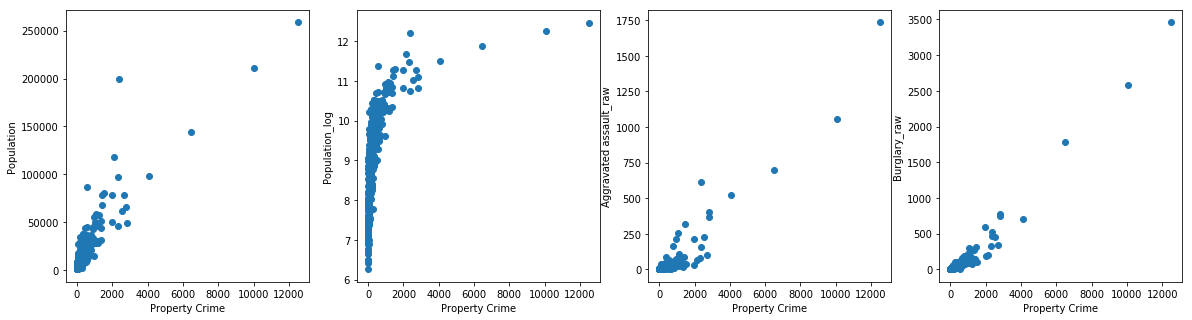

In [22]:
# Linear Relationship

fig = plt.figure(figsize=(20,5))

fig.add_subplot(141)
plt.scatter(features['Property Crime'],features['Population'])
plt.ylabel('Population')
plt.xlabel('Property Crime')

fig.add_subplot(142)
plt.scatter(features['Property Crime'],features['Population_log'])
plt.ylabel('Population_log')
plt.xlabel('Property Crime')

fig.add_subplot(143)
plt.scatter(features['Property Crime'],features['Aggravated assault_raw'])
plt.ylabel('Aggravated assault_raw')
plt.xlabel('Property Crime')

fig.add_subplot(144)
plt.scatter(features['Property Crime'],features['Burglary_raw'])
plt.ylabel('Burglary_raw')
plt.xlabel('Property Crime')

plt.show()

In [52]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = features['Property Crime']
X = features[['Population','Rape_def2','Aggravated assault','Burglary','Robbery','Murder']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [ 3.45072106e-02 -1.68895834e+01 -4.36445436e+01 -5.87203530e+01
 -6.67643298e+01  2.02950171e+01]

Intercept: 
 -30.18561419995973

R-squared:
0.789510562835373


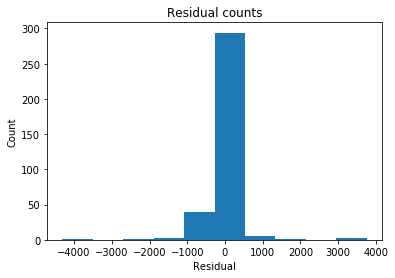

In [53]:
# Multivariate Normality

# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = features['Property Crime']

# Calculate the error, also called the residual.
residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

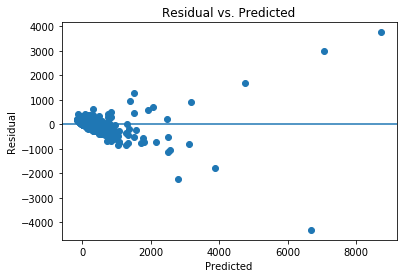

In [54]:
# Homoscedasticity

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [55]:
# Multicollinearity

correlation_matrix = X.corr()
display(correlation_matrix)

,Population,Rape_def2,Aggravated assault,Burglary,Robbery,Murder
Population,1.000,0.393,0.221,0.135,0.344,0.503
Rape_def2,0.393,1.000,0.301,0.212,0.469,0.377
Aggravated assault,0.221,0.301,1.000,0.339,0.428,0.194
Burglary,0.135,0.212,0.339,1.000,0.286,0.102
Robbery,0.344,0.469,0.428,0.286,1.000,0.311
Murder,0.503,0.377,0.194,0.102,0.311,1.000


# Writeup
+ For this model I used simple linear manipulation and other techniques to develop features related to Property Crime in New York City. After creating a dataframe of features I simply substituted each one and measured Homoscedasticity, Multicollinearity, etc.
- Going further, I would create two models - one for more populated areas and one for less populated areas due to the bimodal nature of the Population data. I would also continue to look at a full heatmap of feature correlations in order to further eliminate noise.